In [2]:
import shoebot
import cairocffi as cairo
from io import BytesIO
from IPython.display import Image, SVG, display

Let's create a bot and run some commands.

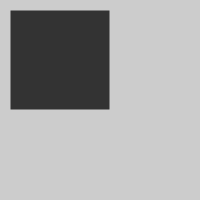

In [3]:
bot = shoebot.create_bot(outputfile='example1.png')

bot.size(200, 200)
bot.background(0.8)
bot.fill(0.2)
bot.rect(10, 10, 100, 100)
bot.finish()

Image('example1.png')

We can also get SVG output.

In [4]:
bot = shoebot.create_bot('example3.svg')

bot.size(200, 200)
bot.background(0.2)
bot.fill(0.8)
bot.rect(10, 10, 100, 100, .4)
bot.finish()

SVG('example3.svg')

ExpatError: syntax error: line 1, column 0

Now, use a Cairo surface instead of a filename.

In [ ]:
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200)
ctx = cairo.Context(surface)
bot = shoebot.create_bot(surface)

bot.size(200, 200)
bot.background(0.8)
bot.fill(0.2)
bot.ellipse(10, 10, 100, 100)
# clunky call, but that's the only way I could do this
bot._canvas._drawqueue.render(ctx)

surface.write_to_png('example2.png')
Image('example2.png')

In [ ]:
surface = cairo.SVGSurface('example.svg', 200, 200)
ctx = cairo.Context(surface)
bot = shoebot.create_bot(surface)

bot.size(200, 200)
bot.background(0.8)
bot.fill(0.2)
bot.ellipse(10, 10, 100, 100)
# clunky call, but that's the only way I could do this
bot._canvas._drawqueue.render(ctx)
bot.finish()

SVG('example.svg')

The same using a byte string in memory, without generating an intermediate file.

This logic comes from jupyter-cairo.

In [ ]:
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200)
ctx = cairo.Context(surface)
bot = shoebot.create_bot(surface)
b = BytesIO()

bot.size(200, 180)
bot.background(0.2)
bot.fill(0.8)
bot.rect(10, 30, 100, 100, .4)
bot._canvas._drawqueue.render(ctx)

surface.write_to_png(b)
b.seek(0)
data = b.read()
Image(data)

Now, let's try and create the surface after doing the draw commands.

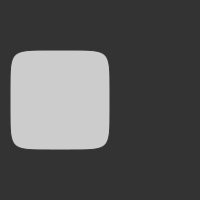

In [5]:
bot = shoebot.create_bot()
bot.size(200, 180)
bot.background(0.2)
bot.fill(0.8)
bot.rect(10, 50, 100, 100, .4)

surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200)
ctx = cairo.Context(surface)
b = BytesIO()
bot._canvas._drawqueue.render(ctx)
surface.write_to_png(b)
b.seek(0)
data = b.read()
Image(data)

Sweet! Now let's try it with `bot.snapshot()`.

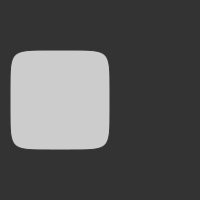

In [7]:
bot = shoebot.create_bot()
bot.size(200, 180)
bot.background(0.2)
bot.fill(0.8)
bot.rect(10, 50, 100, 100, .4)

surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200)
b = BytesIO()
bot.snapshot(surface)
surface.write_to_png(b)
b.seek(0)
data = b.read()
Image(data)

Now abstract this to `bot.show()`.

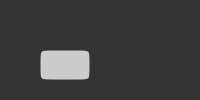

In [11]:
bot = shoebot.create_bot()
bot.size(200, 100)
bot.background(0.2)
bot.fill(0.8)
bot.rect(40, 50, 50, 30, .4)
bot.show()